In [36]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns


In [37]:
#Reade data and replace ? with null
data = pd.read_csv('data/cervical_cancer/risk_factors_cervical_cancer.csv', na_values = '?')
data.isnull().sum()


Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [39]:
#Get datasets ready, investigate collinearity
x = data.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis = 1)
y = data[['Biopsy']]


In [58]:

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(x)
transformed_X = imp.transform(x)
# transformed_y = pd.Series(encoder.fit_transform(y))
clf_a = AdaBoostClassifier(n_estimators=100)
scores_a = cross_val_score(clf_a, transformed_X, y.values.ravel(), cv=5, scoring='roc_auc')

In [62]:
scores_ada = []
for learning in [1, 0.5, 0.25, 0.1, 0.05, 0.01]:
    for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
        clf_a = AdaBoostClassifier(n_estimators=n, learning_rate=learning, random_state=0)
        scores_a = cross_val_score(clf_a, transformed_X, y.values.ravel(), cv=5, scoring='roc_auc')
        score = scores_a.mean()
        scores_ada.append([score, learning, n])

In [63]:
scores_ada_df = pd.DataFrame(scores_ada)
scores_ada_df.columns = ['auc', 'learn_rate', 'n_estimators']
scores_ada_df

,auc,learn_rate,n_estimatores
0,0.509451,1.00,1
1,0.567517,1.00,2
2,0.613858,1.00,4
3,0.622377,1.00,8
4,0.611299,1.00,16
5,0.575247,1.00,32
6,0.535070,1.00,64
7,0.529565,1.00,100
8,0.530955,1.00,200
9,0.509451,0.50,1


In [64]:
learn_avg = scores_grad_df.groupby('learn_rate', as_index=False).mean()[['learn_rate','auc']]
n_avg = scores_grad_df.groupby('n_estimators', as_index=False).mean()[['n_estimatores','auc']]

Text(0.5, 1.0, 'AUC for Different Learning Rate')

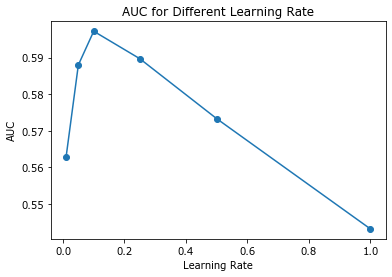

In [66]:
plt.plot(learn_avg.iloc[:,0], learn_avg.iloc[:,1], marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("AUC")
plt.title("AUC for Different Learning Rate")

Text(0.5, 1.0, 'AUC for Different Number of Estimators')

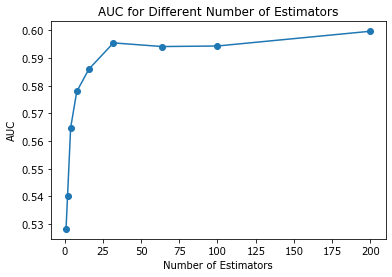

In [67]:
plt.plot(n_avg.iloc[:,0], n_avg.iloc[:,1], marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")
plt.title("AUC for Different Number of Estimators")

In [68]:
max_auc = scores_ada_df['auc'].max()
best_fit = scores_ada_df.loc[scores_ada_df['auc'] == max_auc]
best_fit

,auc,learn_rate,n_estimatores
21,0.659576,0.25,8


In [71]:
scores_grad = []
for depth in [1,2,3,4,5]:
    for learning in [1, 0.5, 0.25, 0.1, 0.05, 0.01]:
        for n in [1, 2, 4, 8, 16, 32, 64, 100, 200]:
            clf_g = GradientBoostingClassifier(n_estimators=n, learning_rate=learning, max_depth=depth, random_state=0)
            scores_g = cross_val_score(clf_g, transformed_X, y.values.ravel(), cv=5, scoring='roc_auc')
            score = scores_g.mean()
            scores_grad.append([score,depth, learning, n])

In [44]:
scores_grad_df = pd.DataFrame(scores_grad)
scores_grad_df.columns = ['auc','depth', 'learn_rate', 'n_estimators']
scores_grad_df

,auc,depth,learn_rate,n_estimatores
0,0.511315,1,1.00,1
1,0.501883,1,1.00,2
2,0.529449,1,1.00,4
3,0.538026,1,1.00,8
4,0.554686,1,1.00,16
5,0.567024,1,1.00,32
6,0.561753,1,1.00,64
7,0.551202,1,1.00,100
8,0.546099,1,1.00,200
9,0.511315,1,0.50,1


In [73]:
depth_avg = scores_grad_df.groupby('depth', as_index=False).mean()[['depth','auc']]
learn_avg = scores_grad_df.groupby('learn_rate', as_index=False).mean()[['learn_rate','auc']]
n_avg = scores_grad_df.groupby('n_estimatores', as_index=False).mean()[['n_estimators','auc']]

KeyError: "['n_estimators'] not in index"

In [72]:
print(depth_avg)
print(learn_avg)
print(n_avg)

NameError: name 'depth_avg' is not defined

In [70]:
plt.plot(depth_avg.iloc[:,0], depth_avg.iloc[:,1], marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("AUC")
plt.title("AUC for Different Tree Depths")

NameError: name 'depth_avg' is not defined

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

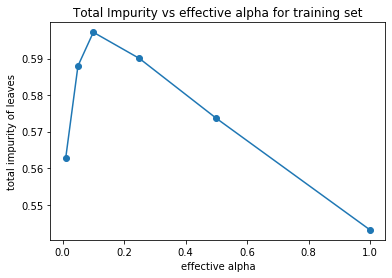

In [99]:
plt.plot(learn_avg.iloc[:,0], learn_avg.iloc[:,1], marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("AUC")
plt.title("AUC for Different Learning Rate")

Text(0.5, 1.0, 'AUC for Different Number of Estimators')

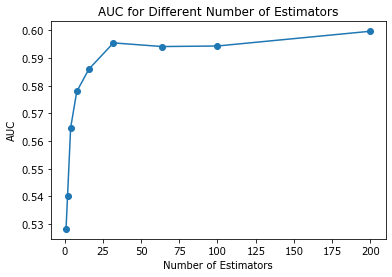

In [69]:
plt.plot(n_avg.iloc[:,0], n_avg.iloc[:,1], marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("AUC")
plt.title("AUC for Different Number of Estimators")

In [57]:
max_auc = scores_grad_df['auc'].max()
best_fit = scores_grad_df.loc[scores_grad_df['auc'] == max_auc]
best_fit

,auc,depth,learn_rate,n_estimatores
34,0.687513,1,0.1,100
